**autocorrect application**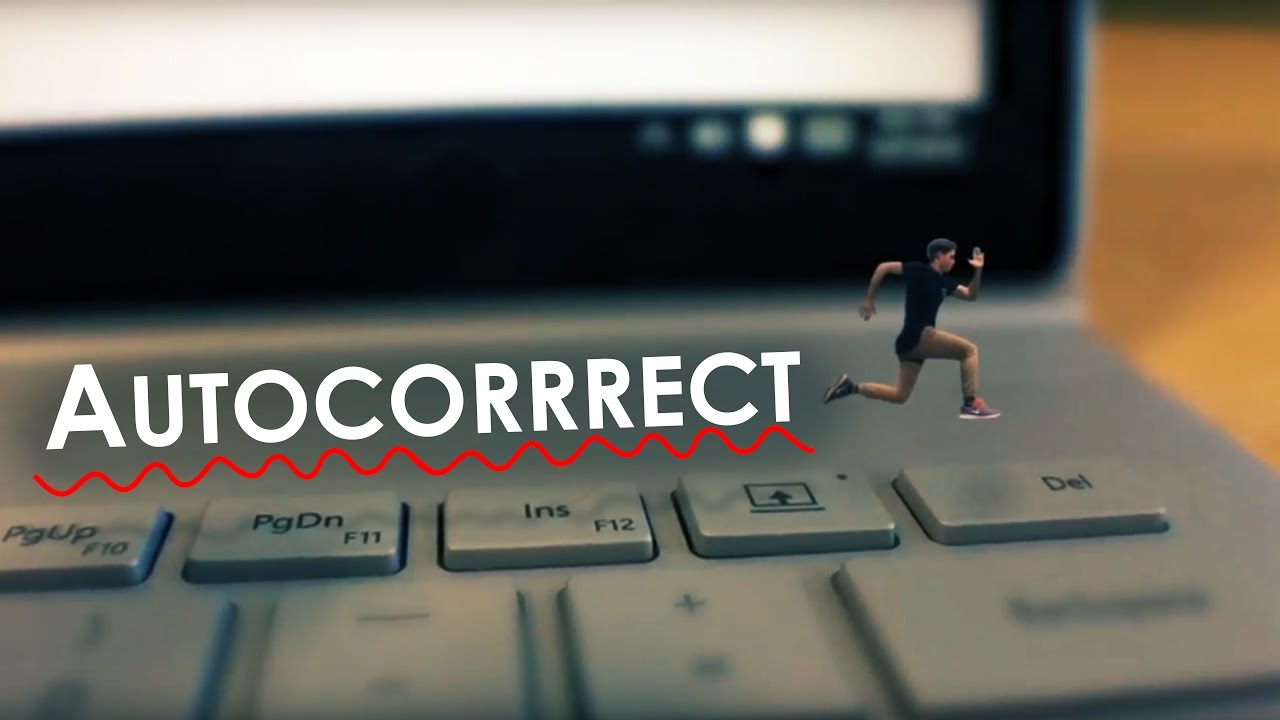

# Define the costs for the minimum edit distance.

In [ ]:
def del_cost():
    return 1

def ins_cost():
    return 1

def sub_cost(c1, c2):
    if c1 == c2:
        return 0
    else:
        return 2

def min_edit_distance(source, target, do_print_chart=False):

    """
    Parameters
    ----------
    source : str
        The source string.
    target : str
        The target string.
    do_print_chart : bool, optional
        Whether to print the dynamic programming table.
    Returns
    -------
    int
        The edit distance between the two strings.
    """

    # Initialize matrix with zeros
    m = len(source)
    n = len(target)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill in the first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill in the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            dp[i][j] = min(
                dp[i-1][j] + del_cost(),        # Deletion
                dp[i][j-1] + ins_cost(),        # Insertion
                dp[i-1][j-1] + sub_cost(source[i-1], target[j-1])  # Substitution
            )

    if do_print_chart:
        for row in dp:
            print(row)

    # Return the bottom-right cell of the matrix
    return dp[m][n]

if __name__ == '__main__':
    w1 = 'intention'
    w2 = 'execution'
    print('Edit distance between', repr(w1), 'and', repr(w2), 'is', min_edit_distance(w1, w2))


Edit distance between 'intention' and 'execution' is 8


# Note
**we have chosen a cost of 1 for deletion and insertion, which is less than the cost of substitution, set at 2. We reasoned that users are more likely to make a deletion or an insertion than a substitution. Additionally, we assumed that a substitution is essentially the sum of an insertion and a deletion. For example, if a user types 'a' instead of 's', it involves deleting 's' and inserting 'a'**

*calculate the minimum edit distance between two strings (source and target) using dynamic programming. It initializes a matrix (D) to store the edit distances between substrings of source and target. It iteratively fills in the matrix based on the costs of deletion, insertion, and substitution operations. The minimum edit distance is then returned along with the matrix. Additionally, printing the dynamic programming table (do_print_chart) and the backtrace of operations (do_print_backtrace) used to transform source into target.* :


In [ ]:
import numpy as np
def min_edit_distance(source, target, do_print_chart=False, do_print_backtrace=False):
    """
    Parameters
    ----------
    source : str
        The source string.
    target : str
        The target string.
    Returns
    -------
    int
        The edit distance between the two strings.
    """

    m = len(source)
    n = len(target)
    D = np.zeros((m+1, n+1), dtype=int)
    for row in range(1,m+1):
        D[row,0] = D[row-1,0] + del_cost()
    for col in range(1,n+1):
        D[0,col] = D[0,col-1] + ins_cost()
    for row in range(1,m+1):
        for col in range(1,n+1):
            r_cost = sub_cost(source[row-1], target[col-1])
            D[row,col] = min([D[row-1,col]+del_cost(), D[row,col-1]+ins_cost(), D[row-1,col-1]+r_cost])

    if do_print_chart:
        print("Substitution Cost Matrix:\n")
        for row in range(0,m+1):
            for col in range(0,n+1):
                print(D[row,col], end=" ")
            print("")

    if do_print_backtrace:
        print("Backtrace:")
        i = m
        j = n
        backtrace = []
        while i > 0 or j > 0:
            if i > 0 and j > 0 and D[i,j] == D[i-1,j-1] + sub_cost(source[i-1], target[j-1]):
                backtrace.append("Substitution: %s -> %s" % (source[i-1], target[j-1]))
                i -= 1
                j -= 1
            elif j > 0 and D[i,j] == D[i,j-1] + ins_cost():
                backtrace.append("Insertion: %s" % target[j-1])
                j -= 1
            else:
                backtrace.append("Deletion: %s" % source[i-1])
                i -= 1
        backtrace.reverse()
        for step in backtrace:
            print(step)

    med = D[m,n]
    return D, med



def del_cost():
    return 1

def ins_cost():
    return 1

def sub_cost(c1, c2):
    if c1 == c2:
        return 0
    else:
        return 2
source =  'intention'
target = 'execution'
matrix, min_edits = min_edit_distance(source, target, do_print_chart=True, do_print_backtrace=True)
print("minimum edits: ",min_edits, "\n")

Substitution Cost Matrix:

0 1 2 3 4 5 6 7 8 9 
1 2 3 4 5 6 7 6 7 8 
2 3 4 5 6 7 8 7 8 7 
3 4 5 6 7 8 7 8 9 8 
4 3 4 5 6 7 8 9 10 9 
5 4 5 6 7 8 9 10 11 10 
6 5 6 7 8 9 8 9 10 11 
7 6 7 8 9 10 9 8 9 10 
8 7 8 9 10 11 10 9 8 9 
9 8 9 10 11 12 11 10 9 8 
Backtrace:
Deletion: i
Substitution: n -> e
Substitution: t -> x
Substitution: e -> e
Insertion: c
Substitution: n -> u
Substitution: t -> t
Substitution: i -> i
Substitution: o -> o
Substitution: n -> n
minimum edits:  8 



- 2nd Methode :

In [ ]:
def min_edit_distance(source, target, do_print_chart=False, do_print_backtrace=False, do_print_alignment=False):
    n = len(source)
    m = len(target)
    Distance = [[0] * (m + 1) for _ in range(n + 1)]
    Backtrace = [[None] * (m + 1) for _ in range(n + 1)]
    Distance[0][0] = 0

    # Initialize the first row and column with indices
    for i in range(1, n + 1):
        Distance[i][0] = Distance[i - 1][0] + del_cost()
        Backtrace[i][0] = 'D'
    for j in range(1, m + 1):
        Distance[0][j] = Distance[0][j - 1] + ins_cost()
        Backtrace[0][j] = 'I'

    # Recurrence relation with backtrace:
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            deletion = Distance[i - 1][j] + del_cost()
            insertion = Distance[i][j - 1] + ins_cost()
            substitution = Distance[i - 1][j - 1] + sub_cost(source[i - 1], target[j - 1])

            min_cost = min(deletion, insertion, substitution)
            Distance[i][j] = min_cost

            # Update backtrace
            if deletion==insertion==substitution:
                Backtrace[i][j] = 'all'
            elif min_cost == deletion:
                Backtrace[i][j] = 'D'  # D for deletion
            elif min_cost == insertion:
                Backtrace[i][j] = 'I'  # I for insertion
            else:
                Backtrace[i][j] = 'S'  # S for substitution

    if do_print_chart:
        for row in Distance:
            print(row)

    if do_print_backtrace:
        # Print backtrace matrix
        for row in Backtrace:
            print(row)

    if do_print_alignment:
        # Print alignment
        align_source = ''
        align_target = ''
        i, j = n, m
        while i > 0 or j > 0:
            if i > 0 and j > 0 and Backtrace[i][j] == 'S':
                align_source = source[i - 1] + align_source
                align_target = target[j - 1] + align_target
                i -= 1
                j -= 1
            elif i > 0 and (j == 0 or Distance[i][j] == Distance[i - 1][j] + del_cost()):
                align_source = source[i - 1] + align_source
                align_target = '-' + align_target
                i -= 1
            else:
                align_source = '-' + align_source
                align_target = target[j - 1] + align_target
                j -= 1
        print("Alignment:")
        print(align_source)
        print(align_target)

    return Distance[n][m], Backtrace


if __name__ == '__main__':
    import sys


    w1 = 'intention'
    w2 = 'execution'

    edit_distance, backtrace = min_edit_distance(w1, w2, do_print_chart=True, do_print_backtrace=True, do_print_alignment=True)
    print(f'Edit distance between "{w1}" and "{w2}" is: {edit_distance}')


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 6, 7, 8]
[2, 3, 4, 5, 6, 7, 8, 7, 8, 7]
[3, 4, 5, 6, 7, 8, 7, 8, 9, 8]
[4, 3, 4, 5, 6, 7, 8, 9, 10, 9]
[5, 4, 5, 6, 7, 8, 9, 10, 11, 10]
[6, 5, 6, 7, 8, 9, 8, 9, 10, 11]
[7, 6, 7, 8, 9, 10, 9, 8, 9, 10]
[8, 7, 8, 9, 10, 11, 10, 9, 8, 9]
[9, 8, 9, 10, 11, 12, 11, 10, 9, 8]
[None, 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']
['D', 'all', 'all', 'all', 'all', 'all', 'all', 'S', 'I', 'I']
['D', 'all', 'all', 'all', 'all', 'all', 'all', 'D', 'all', 'S']
['D', 'all', 'all', 'all', 'all', 'all', 'S', 'D', 'all', 'D']
['D', 'S', 'I', 'I', 'I', 'I', 'D', 'all', 'all', 'D']
['D', 'D', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'D']
['D', 'D', 'all', 'all', 'all', 'all', 'S', 'I', 'I', 'D']
['D', 'D', 'all', 'all', 'all', 'all', 'D', 'S', 'I', 'I']
['D', 'D', 'all', 'all', 'all', 'all', 'D', 'D', 'S', 'I']
['D', 'D', 'all', 'all', 'all', 'all', 'D', 'D', 'D', 'S']
Alignment:
inte----ntion
---execu-tion
Edit distance between "intention" an


**loads a keyboard structure from a file, defines a substitution cost function based on the proximity of keys on the QWERTY keyboard, and then calculates the substitution cost between two characters based on their adjacency on the keyboard layout.**

# Preprocessing of the file qwerty_graph.txt
**If we have noticed, the file is similar to a JSON format file where each letter on the QWERTY keyboard is presented along with the path to each adjacent letter. So, the task is to remove the paths and leave only the adjacent letters of the same letter on each line. As a remark, we can remove the first letter that is presented with what it is adjacent to because its adjacent letter is also present, considering that a letter is adjacent to itself**

In [ ]:
# Reading the qwerty_graph.txt file
with open('qwerty_graph.txt', 'r') as file:
    # Reading all lines from the file
    lines = file.readlines()

# List to store preprocessed records
processed_lines = []

# Initializing a temporary variable to store data of each record
current_record = ""

# Iterating through the lines of the file
for line in lines:
    line = line.strip()
    # If the line is empty, move to the next one
    if not line:
        continue
    # If the line starts with '{', it's the beginning of a new record
    if line.startswith('{'):
        # If data has been stored previously, add it to the list of preprocessed records
        if current_record:
            processed_lines.append(current_record)
            current_record = ""
    # Concatenate the line's data to the current record
    current_record += line

# Add the last record to the list
if current_record:
    processed_lines.append(current_record)

# Writing preprocessed records to a new file
with open('processed_qwerty_graph.txt', 'w') as processed_file:
    for record in processed_lines:
        # Remove the trailing comma from the line if it exists
        if record.endswith(','):
            record = record[:-1]
        processed_file.write(record + '\n')


**Store the cleaned data in a file named result.txt**

In [ ]:
import ast

# List to store extracted data
keyboard_data_list = []

# Opening and reading the qwerty.txt file
with open('processed_qwerty_graph.txt', 'r') as file:
    # Initializing temporary variables
    current_data = {}
    # Iterating through the lines of the file
    for line in file:
        line = line.strip()
        # If the line is not empty
        if line:
            # If the line starts with '{', it's the beginning of a new element
            if line.startswith('{'):
                # If data already exists, add it to the list
                if current_data:
                    keyboard_data_list.append(current_data)
                # Initialize data for the new element
                current_data = ast.literal_eval(line)
            else:
                # Concatenate data for the same element
                current_data.update(ast.literal_eval(line))

    # Add the last element to the list
    if current_data:
        keyboard_data_list.append(current_data)

# Writing the result to a text file
with open('result.txt', 'w') as result_file:
    for data in keyboard_data_list:
        compact_data = "{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}".format(
            data['loop'], data['diag_down_left'], data['diag_down_right'], data['diag_up_left'],
            data['diag_up_right'], data['down'], data['left'], data['right'], data['shift_diag_down_left'],
            data['shift_diag_down_right'], data['shift_diag_up_left'], data['shift_diag_up_right'],
            data['shift_down'], data['shift_left'], data['shift_loop'], data['shift_right'],
            data['shift_up'], data['up']
        )
        result_file.write(compact_data + '\n')


In [ ]:
with open('result.txt', 'r') as f:
  data = f.readlines()
  for line in data:
    print(line)

!,=,w,/,x,q,`,2,+,W,?,X,Q,~,1,@,Z

",/,=,p,],-,;,a,?,+,P,},_,:,',A,{

#,w,r,x,v,e,2,4,W,R,X,V,E,@,3,$,C

$,e,t,c,b,r,3,5,E,T,C,B,R,#,4,%,V

%,r,y,v,n,t,4,6,R,Y,V,N,T,$,5,^,B

&,y,i,n,,,u,6,8,Y,I,N,<,U,^,7,*,M

',/,=,p,],-,;,a,?,+,P,},_,:,",A,{

(,i,p,,,/,o,8,0,I,P,<,?,O,*,9,),>

),o,[,.,',p,9,-,O,{,>,",P,(,0,_,?

*,u,o,m,.,i,7,9,U,O,M,>,I,&,8,(,<

+,[,\,',\,],-,`,{,|,",|,},_,=,~,}

,,7,9,j,l,8,m,.,&,(,J,L,*,M,<,>,K

-,p,],/,],[,0,=,P,},?,},{,),_,+,"

.,8,0,k,;,9,,,/,*,),K,;,(,<,>,?,L

/,9,-,l,',0,.,z,(,_,L,",),>,?,Z,:

0,o,[,.,',p,9,-,O,{,>,",P,(,),_,?

1,=,w,/,x,q,`,2,+,W,?,X,Q,~,!,@,Z

2,q,e,z,c,w,1,3,Q,E,X,C,W,!,@,#,X

3,w,r,x,v,e,2,4,W,R,X,V,E,@,#,$,C

4,e,t,c,b,r,3,5,E,T,C,B,R,#,$,%,V

5,r,y,v,n,t,4,6,R,Y,V,N,T,$,%,^,B

6,t,u,b,m,y,5,7,T,U,B,M,Y,%,^,&,N

7,y,i,n,,,u,6,8,Y,I,N,<,U,^,&,*,M

8,u,o,m,.,i,7,9,U,O,M,>,I,&,*,(,<

9,i,p,,,/,o,8,0,I,P,<,?,O,*,(,),>

:,.,-,o,[,/,l,',>,_,O,{,?,L,;,",P

;,.,-,o,[,/,l,',>,_,O,{,?,L,:,",P

<,7,9,j,l,8,m,.,&,(,J,L,*,M,,,>,K

=,[,\,',\,],-,`,{,|,

**The general idea behind the change within the substitution cost function is that users are highly likely to make errors with adjacent letters rather than entirely different letters. So, the idea is to compare the current letter that the user intends to write with the adjacent letters and decrease the cost value by 1 instead of 2 if they are adjacent. This adjustment is because it is more likely for users to make mistakes with adjacent letters. In our case, we chose 1 as the adjusted cost value. Note that for adjacent letters, we selected the letters surrounding the original letter as a circle so that the cost value is equal for all adjacent values**

In [ ]:
def sub_cost(c1, c2):
    if c1 == c2:
        return 0
    else:
       # Opening and reading the file result.txt
        with open('result.txt', 'r') as file:
            # Iteration through the lines of the file
            for line in file:
                # Remove white spaces and separate elements with commas to obtain a list
                elements = line.strip().split(',')
               # Check if c1 and c2 are on the same line
                if c1 in elements and c2 in elements:
                    return 1
        return 2  # Return 2 if c1 and c2 are not on the same line

# Example of using the sub_cost function
print(sub_cost('z', '2'))  # Suppose 'z' and '2' are on the same line


1


In [ ]:


import numpy as np
def min_edit_distance(source, target, do_print_chart=False, do_print_backtrace=False):
    """
    Parameters
    ----------
    source : str
        The source string.
    target : str
        The target string.
    Returns
    -------
    int
        The edit distance between the two strings.
    """

    m = len(source)
    n = len(target)
    D = np.zeros((m+1, n+1), dtype=int)
    for row in range(1,m+1):
        D[row,0] = D[row-1,0] + del_cost()
    for col in range(1,n+1):
        D[0,col] = D[0,col-1] + ins_cost()
    for row in range(1,m+1):
        for col in range(1,n+1):
            r_cost = sub_cost(source[row-1], target[col-1])
            D[row,col] = min([D[row-1,col]+del_cost(), D[row,col-1]+ins_cost(), D[row-1,col-1]+r_cost])

    if do_print_chart:
        print("Substitution Cost Matrix:\n")
        for row in range(0,m+1):
            for col in range(0,n+1):
                print(D[row,col], end=" ")
            print("")

    if do_print_backtrace:
        print("Backtrace:")
        i = m
        j = n
        backtrace = []
        while i > 0 or j > 0:
            if i > 0 and j > 0 and D[i,j] == D[i-1,j-1] + sub_cost(source[i-1], target[j-1]):
                backtrace.append("Substitution: %s -> %s" % (source[i-1], target[j-1]))
                i -= 1
                j -= 1
            elif j > 0 and D[i,j] == D[i,j-1] + ins_cost():
                backtrace.append("Insertion: %s" % target[j-1])
                j -= 1
            else:
                backtrace.append("Deletion: %s" % source[i-1])
                i -= 1
        backtrace.reverse()
        for step in backtrace:
            print(step)

    med = D[m,n]
    return D, med



def del_cost():
    return 1

def ins_cost():
    return 1
def sub_cost(c1, c2):
    if c1 == c2:
        return 0
    else:

        with open('result.txt', 'r') as file:
            for line in file:
                elements = line.strip().split(',')
                if c1 in elements and c2 in elements:
                    return 1
        return 2




source =  'intention'
target = 'execution'
matrix, min_edits = min_edit_distance(source, target, do_print_chart=True, do_print_backtrace=True)
print("minimum edits: ",min_edits, "\n")


Substitution Cost Matrix:

0 1 2 3 4 5 6 7 8 9 
1 2 3 4 5 5 6 6 7 8 
2 3 4 5 6 6 6 7 8 7 
3 3 4 5 6 7 6 7 8 8 
4 3 4 4 5 6 7 8 9 9 
5 4 5 5 6 6 7 8 9 9 
6 5 6 6 6 7 6 7 8 9 
7 6 7 7 7 7 7 6 7 8 
8 7 8 8 8 8 8 7 6 7 
9 8 9 9 9 9 9 8 7 6 
Backtrace:
Deletion: i
Deletion: n
Substitution: t -> e
Insertion: x
Substitution: e -> e
Insertion: c
Substitution: n -> u
Substitution: t -> t
Substitution: i -> i
Substitution: o -> o
Substitution: n -> n
minimum edits:  6 



**If you notice, the result number of minimum edit distance has decreased**


 - loads a dictionary from a text file(big.txt), processes each line to extract words, removes non-alphabetic characters, converts words to lowercase, sorts them alphabetically, and removes duplicate words, returning a list of unique words.

In [ ]:
import re

def load_dictionary(filename):
    with open(filename, 'r') as file:
        words = []
        for line in file:
            # Split the line into words
            line_words = line.split()
            # Process each word individually
            for word in line_words:
                # Remove symbols that are not letters
                cleaned_word = re.sub(r'[^a-zA-Z]', '', word)
                # Ensure the word is not empty after cleaning
                if cleaned_word:
                    # Append the cleaned word to the list
                    words.append(cleaned_word.lower())  # Optionally convert to lowercase
        # Sort the words alphabetically
        words.sort()
        # Remove duplicate words
        unique_words = set(words)
    return list(unique_words)



dictionary = load_dictionary('big.txt')
dictionary

['viktorovna',
 'viscid',
 'villager',
 'studies',
 'defects',
 'genesis',
 'veinspunctured',
 'broadbrimmed',
 'cabman',
 'soda',
 'infantrymen',
 'houselet',
 'rich',
 'extravagant',
 'destiny',
 'tarry',
 'jutting',
 'expiation',
 'whigs',
 'broadhaunched',
 'temporal',
 'settles',
 'rush',
 'unemployed',
 'mucusmucopus',
 'longtemps',
 'eruptive',
 'spilt',
 'makar',
 'rejoining',
 'ravage',
 'diabetic',
 'hellish',
 'haemoptysis',
 'roofs',
 'impedes',
 'craterlike',
 'fervent',
 'sometime',
 'frenchmen',
 'used',
 'mendicants',
 'heroes',
 'desertwe',
 'pittsburgh',
 'disappears',
 'respectable',
 'sargent',
 'lighten',
 'indexes',
 'phone',
 'appraisal',
 'expensive',
 'laziness',
 'constitute',
 'singularity',
 'purpuric',
 'seamen',
 'wm',
 'suites',
 'squeaky',
 'milesabout',
 'eyesat',
 'reliable',
 'self',
 'dictatorship',
 'division',
 'shafts',
 'grimace',
 'wardrops',
 'annexationa',
 'drons',
 'welcomed',
 'indefinite',
 'equivocatei',
 'trailed',
 'lightcolored',
 'sha

- corrects the spelling of a given word by finding the closest matches from a provided dictionary using the minimum edit distance algorithm, returning a list of possible corrections.

In [ ]:
from heapq import nsmallest

word_l = load_dictionary('big.txt')

# Source word to compare
source_word = "intention"

# Dictionary to store minimum edit distances for each word
distance_dict = {}

# Calculate the minimum edit distance between the source word and each word from word_l
for target in word_l:
    _, distance = min_edit_distance(source_word, target)  # Only distance is of interest
    distance_dict[target] = distance

# Extract the 3 words with the lowest minimum edit distances
closest_words = nsmallest(3, distance_dict, key=distance_dict.get)

# Display the results
print(f"For the source word '{source_word}', the 3 closest words are:")
for i, word in enumerate(closest_words, 1):
    print(f"{i}. {word} with an edit distance of {distance_dict[word]}")


Pour le mot source 'intention', les 3 mots les plus proches sont :
1. intention avec une distance d'édition de 0
2. invention avec une distance d'édition de 1
3. intentions avec une distance d'édition de 1


**In the previous question, we noticed that the min edit distance function is a bit slow, which is due to the large volume of valid word files. Therefore, in this question, we propose some ideas to reduce the calculation rate between invalid and valid words from files.**

*Firstly, we start by comparing only the words that start with the same letter because we assume that the user probably does not make errors in the first letter. Additionally, we have observed that in most cases, the user types invalid words of the same length as the correct word, which reduces the search volume in the valid word file.*

In [ ]:
from heapq import nsmallest

word_l = load_dictionary('big.txt')

# Source word to compare
source_word = "intention"

# Filter words from the list to keep only those starting with the same letter
word_l_filtered = [word for word in word_l if word.startswith(source_word[0])]

# Dictionary to store minimum edit distances for each word
distance_dict = {}

# Calculate the length of the source word
source_length = len(source_word)

# Calculate the minimum edit distance between the source word and each word from word_l_filtered
for target in word_l_filtered:
    # Compare only words of the same length or similar length
    if abs(len(target) - source_length) <= 2:  # Allowing maximum difference of 2 characters
      _, distance = min_edit_distance(source_word, target)  # Only distance is of interest
      distance_dict[target] = distance

# Extract the 3 words with the lowest minimum edit distances
closest_words = nsmallest(3, distance_dict, key=distance_dict.get)

# Display the results
print(f"For the source word '{source_word}', the 3 closest words are:")
for i, word in enumerate(closest_words, 1):
    print(f"{i}. {word} with an edit distance of {distance_dict[word]}")


For the source word 'intention', the 3 closest words are:
1. intention with an edit distance of 0
2. invention with an edit distance of 1
3. intentions with an edit distance of 1


In [ ]:
def del_cost():
    return 1

def ins_cost():
    return 1

def sub_cost(c1, c2):
    if c1 == c2:
        return 0
    else:
        # Open and read the result.txt file
        with open('result.txt', 'r') as file:
            # Iterate through the lines of the file
            for line in file:
                # Remove white spaces and separate elements with commas to obtain a list
                elements = line.strip().split(',')
                # Check if c1 and c2 are on the same line
                if c1 in elements and c2 in elements:
                    return 1
        return 2




**As you can see, the calculation time has decreased from 3 minutes to 1 second.**

In [ ]:
from heapq import nsmallest

word_l = load_dictionary('big.txt')

# Source word to compare
source_word = "intention"

# Dictionary to store minimum edit distances for each word
distance_dict = {}

# Calculate the minimum edit distance between the source word and each word from word_l
for target in word_l:
    _, distance = min_edit_distance(source_word, target)  # Only distance is of interest
    distance_dict[target] = distance

# Extract the 3 words with the lowest minimum edit distances
closest_words = nsmallest(3, distance_dict, key=distance_dict.get)

# Display the results
print(f"For the source word '{source_word}', the 3 closest words are:")
for i, word in enumerate(closest_words, 1):
    print(f"{i}. {word} with an edit distance of {distance_dict[word]}")


**The second observation is that in most cases, the user makes errors in words that sound similar. Therefore, instead of calculating the minimum edit distance with the entire corpus, we only calculate it with words that sound similar to the incorrect word. This will reduce the calculation rate.**

In [ ]:
!pip install jellyfish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
import jellyfish

# Source word to compare
source_word = "intention"

# Calculate the Soundex code of the source word
source_soundex = jellyfish.soundex(source_word)

# Filter words from the list to keep only those having the same Soundex code
similar_sounding_words = [word for word in word_l if jellyfish.soundex(word) == source_soundex]

# Dictionary to store minimum edit distances for each similar sounding word
distance_dict = {}

# Calculate the minimum edit distance between the source word and each similar sounding word
for target in similar_sounding_words:
    _, distance = min_edit_distance(source_word, target)  # Only distance is of interest
    distance_dict[target] = distance

# Extract the 3 words with the lowest minimum edit distances
closest_words = nsmallest(3, distance_dict, key=distance_dict.get)

# Display the results
print(f"For the source word '{source_word}', the 3 closest words are:")
for i, word in enumerate(closest_words, 1):
    print(f"{i}. {word} with an edit distance of {distance_dict[word]}")


**Another observation is that users in most cases do not use all the words in the vocabulary. We have noticed that there are frequently used words. Therefore, in this approach, we choose only the top 10,000 frequently used words to perform the calculation instead of the entire corpus.**

In [ ]:
from collections import Counter
import re

def get_most_common_words(words, num_words):
    """
    Input:
        words: list of words
        num_words: number of most common words to return
    Output:
        list of num_words most common words
    """
    word_counts = Counter(words)
    most_common_words = [word for word, _ in word_counts.most_common(num_words)]
    return most_common_words

# Get the most common words from the big.txt file
word_list = load_dictionary('big.txt')
most_common_words = get_most_common_words(word_list, 10000)




In [ ]:
from heapq import nsmallest

filtered_word_list = [word for word in word_list if word in most_common_words]

# Source word to compare
source_word = "intention"

# Dictionary to store minimum edit distances for each filtered word
distance_dict = {}

# Calculate the minimum edit distance between the source word and each filtered word
for target in filtered_word_list:
    _, distance = min_edit_distance(source_word, target)  # Only distance is of interest
    distance_dict[target] = distance

# Extract the 3 words with the lowest minimum edit distances
closest_words = nsmallest(3, distance_dict, key=distance_dict.get)

# Display the results
print(f"For the source word '{source_word}', the 3 closest words among the most common ones are:")
for i, word in enumerate(closest_words, 1):
    print(f"{i}. {word} with an edit distance of {distance_dict[word]}")


**Finally, most users make errors in keyboard typing, where sometimes they intend to type in QWERTY but mistakenly type in AZERTY. Therefore, in this approach, when they enter an invalid word in AZERTY, it is transformed as if it were typed in QWERTY while preserving the position of each letter.
**

In [ ]:
import csv

# Definition of the matrix according to your specifications
matrix = [
    ['&', 'é', '"', "'", '(', '-', 'è', '_', 'ç', 'à', ')']
]

# Replacement of the second row
matrix.append(['a', 'z', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', '^'])

# Replacement of the third row
matrix.append(['q', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'ù'])

# Replacement of the fourth row
matrix.append(['w', 'x', 'c', 'v', 'b', 'n', ',', ';', ':', '!'])

# Writing the matrix to a CSV file
with open('keyboard_matrix_azerty.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in matrix:
        writer.writerow(row)


In [ ]:
import csv


with open('keyboard_matrix_azerty.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


In [ ]:
import csv

# Definition of the matrix according to your specifications for the QWERTY keyboard
matrix = [
    ['~', '!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+'],
]

# Replacement of the second row
matrix.append(['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', '{', '}'])

# Replacement of the third row
matrix.append(['a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', ':', '"'])

# Replacement of the fourth row
matrix.append(['z', 'x', 'c', 'v', 'b', 'n', 'm', '<', '>', '?'])

# Writing the matrix to a CSV file
with open('keyboard_matrix_qwerty.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    for row in matrix:
        writer.writerow(row)


In [ ]:
import pandas as pd


df = pd.read_csv('keyboard_matrix_qwerty.csv', header=None)

print(df)



In [ ]:
import csv

# Loading the QWERTY keyboard matrix from the CSV file
keyboard_matrix = []
with open('keyboard_matrix_qwerty.csv', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        keyboard_matrix.append(row)

# Function to correct an incorrect word using the QWERTY keyboard layout
def correct_word_with_qwerty_layout(word):
    corrected_word = ''
    for char in word:
        char_lower = char.lower()
        found = False
        for row in keyboard_matrix:
            if char_lower in row:
                col_index = row.index(char_lower)
                corrected_char = keyboard_matrix[1][col_index]  # Using the same column on the first row
                corrected_word += corrected_char
                found = True
                break
        if not found:
            corrected_word += char  # Keep the original character if not found in the keyboard matrix
    return corrected_word

# Example of usage
incorrect_word = 'fiot'
corrected_word = correct_word_with_qwerty_layout(incorrect_word)
print(f"Incorrect word: {incorrect_word}")
print(f"Corrected word: {corrected_word}")


In [ ]:
import csv

# Loading the QWERTY keyboard matrix from the CSV file
keyboard_matrix = []
with open('keyboard_matrix_azerty.csv', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        keyboard_matrix.append(row)

# Function to correct an incorrect word using the QWERTY keyboard layout
def correct_word_with_qwerty_layout(word):
    corrected_word = ''
    for char in word:
        char_lower = char.lower()
        found = False
        for row in keyboard_matrix:
            if char_lower in row:
                col_index = row.index(char_lower)
                corrected_char = keyboard_matrix[1][col_index]  # Using the same column on the first row
                corrected_word += corrected_char
                found = True
                break
        if not found:
            corrected_word += char  # Keep the original character if not found in the keyboard matrix
    return corrected_word

# Example of usage
incorrect_word = 'wiot'
corrected_word = correct_word_with_qwerty_layout(incorrect_word)
print(f"Incorrect word: {incorrect_word}")
print(f"Corrected word: {corrected_word}")


# Another approach.
**We consider the problem of determining the most probable correction of an out-of-dictionary word. Thus, the problem is to find the correction c, among all possible candidate corrections, that maximizes the probability that c is the desired correction, given the original word w: argmax c∈candidates P(c∣w)argmaxc∈candidatesP(c∣w). By Bayes' theorem, this is equivalent to: argmax c∈candidates P(c) P(w∣c)/P(w)argmaxc∈candidatesP(c)P(w∣c)/P(w). Since P(w)P(w) is the same for each possible candidate c, we can eliminate it, resulting in: argmax c∈candidates P(c) P(w∣c)argmaxc∈candidatesP(c)P(w∣c). The elements of this equation are: Language model: P(c)P(c) The probability that cc appears as a word in an English text. Error model: P(w∣c)P(w∣c) The probability that w is typed in a text when the author intended to write c. For example, P(teh∣the)P(teh∣the) is relatively high, but P(theeexyz∣the)P(theeexyz∣the) would be very low**

# QUESTION 1 :
Implement the process_data(corpus_file) function which allows you to read the given corpus in the form of a text file, convert the text to lowercase and segment the text and returns the list of words.

# Data Preprocessing

In [ ]:
import re
from collections import Counter
import numpy as np
import pandas as pd



In [ ]:
def process_data(file_name):
    words = []
    with open(file_name) as f:
        file_name_data = f.read()
    file_name_data=file_name_data.lower()
    words = re.findall('\w+',file_name_data)
    return words

the 'words' is converted to a python set. This eliminates any duplicate entries.

In [ ]:
# Process data
word_l = process_data('big.txt')

# Create vocabulary set
vocab = set(word_l)

# Print first ten words
print("The first 30 words in the text are:")
print(word_l[:30])

# Print number of unique words in the vocabulary
print(f"There are {len(vocab)} unique words in the vocabulary.")


The first 30 words in the text are:
['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'sir', 'arthur', 'conan', 'doyle', '15', 'in', 'our', 'series', 'by', 'sir', 'arthur', 'conan', 'doyle', 'copyright', 'laws', 'are', 'changing', 'all', 'over']
There are 32198 unique words in the vocabulary.


# QUESTION 2 :
Implement the function get_vocabulary(corpus_file) which returns the vocabulary constructed from a corpus passed as an argument to the function.

the get_vocabulary function that takes the corpus file path as input. It then reads the file line by line, converts each line to lowercase, uses regular expressions to extract words from each line, and then adds those words to the vocabulary using a set.

In [ ]:
import re

def get_vocabulary(corpus_file):
    """
    Input:
        corpus_file: Path to the corpus file.
    Output:
        vocab: Set containing all unique words in the corpus.
    """
    vocab = set()

    # Read the corpus file and process it
    with open(corpus_file, 'r') as f:
        corpus_data = f.read()

    # Convert everything to lowercase and find words using regular expression
    corpus_data = corpus_data.lower()
    words = re.findall('\w+', corpus_data)

    # Construct the vocabulary
    vocab = set(words)

    return vocab

In [ ]:
# Example usage:
vocab = get_vocabulary('big.txt')
print(f"There are {len(vocab)} unique words in the vocabulary.")
print(vocab)


There are 32198 unique words in the vocabulary.
{'astute', 'proposals', 'dancer', '_syphilis_', 'invited', 'obeying', 'defines', 'emunctories', '1818', 'saltpeter', 'obstructed', 'gzhat', 'lopped', 'calmly', 'supremacy', '285', 'bogota', 'unofficially', 'incurred', 'capitale', 'prostrated', 'challenging', '392', 'pacifier', 'ty', 'subclavian', '_neuroma_', '_atlas', 'golukhovski', 'gwown', 'apple', 'cotton', 'means', 'needful', 'scrupulously', 'fiver', 'dishonored', 'germination', 'doe', 'mould', '172', '_silk_', 'superiors', 'qualms', 'chinaware', '_torn', 'marshall_', '1776', 'bits', 'unerring', 'interlocking', 'slacken', 'manual', 'illustrations_', 'clarify', 'shrinkage', 'uncompromising', '67ff', 'grape', 'grows', 'identical', 'haematoma_', 'cock', 'constitution', 'carpus', 'shrilly', 'permeation', 'clump', 'grant', 'empowering', 'sores', 'picnic', 'puffed', 'sink', 'lactate', '610', 'stocking', 'scorbutics', 'deem', 'serums_', 'villas', '_autobiography_', 'faithlessness', 'module'

# QUESTION 3:
We can estimate the probability of a word, by counting the number of times that word appears in a large corpus of text and dividing over the corpus size. Write a function that builds the language model by calculating the probability of each word based on the big.txt file provided with this lab and stores the result in an appropriate data structure. Don't forget to preprocess with the process_data function.



-  starting by Implement a get_count function that returns a dictionary
- Implemention of a get_count which returns a dictionary where the key is a word and the value is the number of times the word appears in the list.



In [ ]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus.
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}  # fill this with word counts
    word_count_dict = Counter(word_l)
    return word_count_dict

In [ ]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'look' is {word_count_dict.get('look',0)}")

There are 32198 key values pairs
The count for the word 'look' is 567


Given the sentence "The quick brown fox jumps over the lazy dog," we want to compute the probabilities of each word in this sentence based on their frequencies in the corpus.
P(wi)=C(wi)/M
where

- C(wi) is the total number of times wi appears in the corpus.

- M is the total number of words in the corpus.

For example,For example, the probability of the word 'the' in the given sentence is:

P(the)=C(wi)/M = 2/9
Instructions: Implement the get_probs function, which computes the probability that a word occurs in a sample. This function returns a dictionary where the keys are words, and the value for each word is its probability in the corpus of words.

In [ ]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur.
    '''
    probs = {}  # return this variable correctly

    m = sum(word_count_dict.values())
    for key in word_count_dict.keys():
        probs[key] = word_count_dict[key] / m
    ### END CODE HERE ###
    return probs

In [ ]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('look') is {probs['look']:.4f}")

Length of probs is 32198
P('look') is 0.0005


# QUESTION 4 :

Now that we have calculated  P(wi)
for all words in the corpus, we'll create several functions to handle string manipulation. These functions will allow us to correct erroneous strings and provide the correct spellings of the words. In this section, we'll implement three functions:

delete_letter: This function takes a word as input and returns all possible strings obtained by removing one character from the word.
replace_letter: This function takes a word as input and returns all possible strings obtained by replacing one character with a different letter.
insert_letter: This function takes a word as input and returns all possible strings obtained by inserting an additional character into the word.








*   LisInstructions for the delete_letter function:

The delete_letter function is designed to generate all possible words in the vocabulary that have one missing character compared to the input word.

To implement the delete_letter function, follow these steps:

- Initialize an empty list, delete_l, to store all possible strings obtained by deleting one character from the input word.
- Create a list of splits, split_l, which represents all possible ways to split the input word into two parts: one part before the character to be deleted and another part after it.
- Iterate through each split in split_l. For each split, remove one character from the second part and concatenate the first part with the modified second part to form a new word.
- Append the new word to the delete_l list.
- If the verbose parameter is set to True, print the input word, the list of splits, and the list of generated words for debugging purposes.
- Return the list delete_l containing all possible words obtained by deleting one character from the input word.

For example, given the input word "nice", the delete_letter function would return the list ['ice', 'nce', 'nie', 'nic'] representing all possible words with one missing character.
t item




In [ ]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''

    delete_l = []
    split_l = []

    for c in range(len(word)):
        split_l.append((word[:c],word[c:]))
    for a,b in split_l:
        delete_l.append(a+b[1:])


    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [ ]:
delete_word_l = delete_letter(word="delete",
                        verbose=True)

input word delete, 
split_l = [('', 'delete'), ('d', 'elete'), ('de', 'lete'), ('del', 'ete'), ('dele', 'te'), ('delet', 'e')], 
delete_l = ['elete', 'dlete', 'deete', 'delte', 'delee', 'delet']


In [ ]:
print(f"Number of outputs of delete_letter('up') is {len(delete_letter('up'))}")

Number of outputs of delete_letter('up') is 2


The `substitute_letter` function generates all possible words by substituting one letter from the original word with a different letter. It first initializes an empty list to store these words. Then, it iterates through each possible split of the word into two parts: one before the letter to be replaced and one after it. For each split, it iterates through all lowercase English letters and creates a new word by substituting the current letter for the one to be replaced. After removing the original word from the list to ensure only words with one letter substitution are included, it sorts the list for easier viewing. Optionally, if the `verbose` parameter is set to `True`, the function prints the input word, the list of splits, and the list of generated words for debugging purposes. Finally, it returns the list of generated words.

In [ ]:
def substituate_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word.
    '''

    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []


    for c in range(len(word)):
        split_l.append((word[0:c],word[c:]))
    replace_l = [a + l + (b[1:] if len(b)> 1 else '') for a,b in split_l if b for l in letters]
    replace_set=set(replace_l)
    replace_set.remove(word)


    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))

    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")

    return replace_l

In [ ]:
replace_l = substituate_letter(word='out',
                              verbose=True)

Input word = out 
split_l = [('', 'out'), ('o', 'ut'), ('ou', 't')] 
replace_l ['aut', 'but', 'cut', 'dut', 'eut', 'fut', 'gut', 'hut', 'iut', 'jut', 'kut', 'lut', 'mut', 'nut', 'oat', 'obt', 'oct', 'odt', 'oet', 'oft', 'ogt', 'oht', 'oit', 'ojt', 'okt', 'olt', 'omt', 'ont', 'oot', 'opt', 'oqt', 'ort', 'ost', 'ott', 'oua', 'oub', 'ouc', 'oud', 'oue', 'ouf', 'oug', 'ouh', 'oui', 'ouj', 'ouk', 'oul', 'oum', 'oun', 'ouo', 'oup', 'ouq', 'our', 'ous', 'ouu', 'ouv', 'ouw', 'oux', 'ouy', 'ouz', 'ovt', 'owt', 'oxt', 'oyt', 'ozt', 'put', 'qut', 'rut', 'sut', 'tut', 'uut', 'vut', 'wut', 'xut', 'yut', 'zut']


The `insert_letter` function generates all possible words by inserting a single letter at every offset within the input word. It iterates through each position in the word, inserts each letter of the alphabet at that position, and stores the resulting words in a list. The function returns this list of generated words. If the `verbose` parameter is set to `True`, the function also prints the input word, the list of splits, and the list of generated words for debugging purposes.

In [ ]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    '''
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []


    for c in range(len(word)+1):
        split_l.append((word[0:c],word[c:]))
    insert_l = [ a + l + b for a,b in split_l for l in letters]


    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")

    return insert_l

In [ ]:
insert_l = insert_letter('up', True)
print(f"Number of strings output by insert_letter('up') is {len(insert_l)}")

Input word up 
split_l = [('', 'up'), ('u', 'p'), ('up', '')] 
insert_l = ['aup', 'bup', 'cup', 'dup', 'eup', 'fup', 'gup', 'hup', 'iup', 'jup', 'kup', 'lup', 'mup', 'nup', 'oup', 'pup', 'qup', 'rup', 'sup', 'tup', 'uup', 'vup', 'wup', 'xup', 'yup', 'zup', 'uap', 'ubp', 'ucp', 'udp', 'uep', 'ufp', 'ugp', 'uhp', 'uip', 'ujp', 'ukp', 'ulp', 'ump', 'unp', 'uop', 'upp', 'uqp', 'urp', 'usp', 'utp', 'uup', 'uvp', 'uwp', 'uxp', 'uyp', 'uzp', 'upa', 'upb', 'upc', 'upd', 'upe', 'upf', 'upg', 'uph', 'upi', 'upj', 'upk', 'upl', 'upm', 'upn', 'upo', 'upp', 'upq', 'upr', 'ups', 'upt', 'upu', 'upv', 'upw', 'upx', 'upy', 'upz']
Number of strings output by insert_letter('up') is 78


# QUESTION 4.1:

Instructions: Create the `edits1` function to generate all possible edits that are one edit away from a given word. These edits include replacements, insertions, and deletions. This function should utilize the previously implemented functions to achieve its purpose.

It's important to note that the functions used in this process return lists, whereas the `edits1` function is expected to return a Python set. By utilizing a set, any duplicate entries can be eliminated automatically.

In [ ]:
def edits1(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """

    edits1_set = set()

    edits1_set.update(delete_letter(word))
    if allow_switches:
        edits1_set.update(substituate_letter(word))
        edits1_set.update(insert_letter(word))

    return edits1_set

In [ ]:
tmp_word = "up"
tmp_edits1_set = edits1(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edits1_l = sorted(list(tmp_edits1_set))

print(f"input word {tmp_word} \nedits1_l \n{tmp_edits1_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edits1_set)}")
print(f"Number of outputs from edits1('up') is {len(edits1('up'))}")

input word up 
edits1_l 
['ap', 'aup', 'bp', 'bup', 'cp', 'cup', 'dp', 'dup', 'ep', 'eup', 'fp', 'fup', 'gp', 'gup', 'hp', 'hup', 'ip', 'iup', 'jp', 'jup', 'kp', 'kup', 'lp', 'lup', 'mp', 'mup', 'np', 'nup', 'op', 'oup', 'p', 'pp', 'pup', 'qp', 'qup', 'rp', 'rup', 'sp', 'sup', 'tp', 'tup', 'u', 'ua', 'uap', 'ub', 'ubp', 'uc', 'ucp', 'ud', 'udp', 'ue', 'uep', 'uf', 'ufp', 'ug', 'ugp', 'uh', 'uhp', 'ui', 'uip', 'uj', 'ujp', 'uk', 'ukp', 'ul', 'ulp', 'um', 'ump', 'un', 'unp', 'uo', 'uop', 'upa', 'upb', 'upc', 'upd', 'upe', 'upf', 'upg', 'uph', 'upi', 'upj', 'upk', 'upl', 'upm', 'upn', 'upo', 'upp', 'upq', 'upr', 'ups', 'upt', 'upu', 'upv', 'upw', 'upx', 'upy', 'upz', 'uq', 'uqp', 'ur', 'urp', 'us', 'usp', 'ut', 'utp', 'uu', 'uup', 'uv', 'uvp', 'uw', 'uwp', 'ux', 'uxp', 'uy', 'uyp', 'uz', 'uzp', 'vp', 'vup', 'wp', 'wup', 'xp', 'xup', 'yp', 'yup', 'zp', 'zup']

The type of the returned object should be a set <class 'set'>
Number of outputs from edits1('up') is 128


QUESTION 4.2:

Instructions: Extend the functionality to generate two edits on a given word. This involves obtaining all possible edits on a single word and then, for each modified word, generating further modifications.

To implement this, create the `edits2` function, which returns a set of words that are two edits away from the original word. It's worth noting that creating additional edits based on the `edits1` function may result in some one-edits being reverted to zero or one edits. This behavior is acceptable in this context and is accounted for in the `get_corrections` function.

In [ ]:
def edits2(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edits2_set = set()

    edit_one = edits1(word,allow_switches=allow_switches)
    for w in edit_one:
        if w:
            edit_two = edits1(w,allow_switches=allow_switches)
            edits2_set.update(edit_two)

    return edits2_set

In [ ]:
tmp_edits2_set = edits2("u")
tmp_edits2_l = sorted(list(tmp_edits2_set))
print(f"Number of strings with edit distance of two: {len(tmp_edits2_l)}")
print(f"First 10 strings {tmp_edits2_l[:10]}")
print(f"Last 10 strings {tmp_edits2_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edits2_set)}")
print(f"Number of strings that are 2 edit distances from 'up' is {len(edits2('up'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aau', 'ab', 'abu', 'ac', 'acu', 'ad', 'adu']
Last 10 strings ['zv', 'zvu', 'zw', 'zwu', 'zx', 'zxu', 'zy', 'zyu', 'zz', 'zzu']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'up' is 7130


# QUESTION 4.3 :

which filters the words from the list 'words' that are not in the dictionary (thus keeping only the valid words). using the function 'get_vocabulary(corpus_file)'.

In [ ]:
import random

def knownWord(dictionary):
    """
    Input:
        dictionary: Set containing all valid words.
    Output:
        filtered_words: List of 10 random words that are present in the dictionary.
    """
    # Convert the dictionary set to a list and shuffle it
    dictionary_list = list(dictionary)
    random.shuffle(dictionary_list)

    # Take the first 10 shuffled words
    filtered_words = dictionary_list[:10]
    return filtered_words

# Example usage:
# Get the vocabulary from the 'big.txt' corpus file
dictionary = get_vocabulary('big.txt')

# Filter 10 random words from the vocabulary
valid_words = knownWord(dictionary)

# Print the filtered words
print("Valid words:", valid_words)


Valid words: ['hello', 'intellects', '_cancer', 'society', '7000', 'weed', 'divinely', '1803', 'ryazana', 'mettlesome']


# QUESTION 5:

- If the word is in the vocabulary, suggest it.
- If not, check for suggestions from edit_one_letter in the vocabulary.
- If not found, check for suggestions from edit_two_letters.
- If still not found, suggest the input word itself.
Priority is given to suggestions with fewer edits, favoring accuracy.

In [ ]:
def candidates(word, probs, vocab, n=2, verbose = False):
    '''
    Input:
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output:
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''

    suggestions = []
    n_best = []


    suggestions = list((word in vocab and word) or edits1(word).intersection(vocab) or edits2(word).intersection(vocab))
    n_best = [[s,probs[s]] for s in list(reversed(suggestions))]


    if verbose: print("suggestions = ", suggestions)

    return n_best

In [ ]:
# Test the implementation -
my_word = 'na2'
tmp_corrections = candidates(my_word, probs, vocab, 2, verbose=True)
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

suggestions =  ['na', 'nan', 'nag', 'nay', 'nap']
word 0: nap, probability 0.000007
word 1: nay, probability 0.000003
word 2: nag, probability 0.000002
word 3: nan, probability 0.000001
word 4: na, probability 0.000003
data type of corrections <class 'list'>


# QUESTION 6 :

Using the previous functions, write the function correction(word, k) which returns the k
most likely corrections of the word word.

In [ ]:
def correction(word, k, probs, vocab):
    """
    Input:
        word: The word to be corrected.
        k: Number of most probable corrections to return.
        probs: A dictionary that maps each word to its probability in the corpus.
        vocab: A set containing all the vocabulary.
    Output:
        top_k_corrections: A list of tuples with the top k most probable corrections and their probabilities.
    """
    # Get the candidate corrections for the word
    candidates_list = candidates(word, probs, vocab)

    # Sort the candidates based on their probabilities
    sorted_candidates = sorted(candidates_list, key=lambda x: x[1], reverse=True)

    # Return the top k most probable corrections
    top_k_corrections = sorted_candidates[:k]

    return top_k_corrections

In [ ]:
# Example usage:
word_to_correct = "na2"
k = 5
# Assume "probs" and "vocab" are already defined from previous parts of the code
top_k_corrections = correction(word_to_correct, k, probs, vocab)
print(f"Top {k} corrections for '{word_to_correct}':")
for i, (word, probability) in enumerate(top_k_corrections):
    print(f"{i+1}. Word: {word}, Probability: {probability:.6f}")

Top 5 corrections for 'na2':
1. Word: nap, Probability: 0.000007
2. Word: nay, Probability: 0.000003
3. Word: na, Probability: 0.000003
4. Word: nag, Probability: 0.000002
5. Word: nan, Probability: 0.000001
